Import Packages

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [22]:
parent_dir = '../../../data/thread_ring/3/'

N = 5_000_000
R = 1_000_000_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}6/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [23]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 7 10:40:22 2025 +0200) (509.82ms elap...,0.275,0.0000,0.277,0.54,0.10,7.00,59.63 C,Nominal
1,(Mon Apr 7 10:40:22 2025 +0200) (509.06ms elap...,1.220,0.0362,0.382,1.60,0.28,21.67,60.13 C,Nominal
2,(Mon Apr 7 10:40:23 2025 +0200) (507.28ms elap...,2.870,0.0000,0.506,3.35,0.93,52.42,60.13 C,Nominal
3,(Mon Apr 7 10:40:23 2025 +0200) (505.74ms elap...,5.420,0.0000,0.461,6.12,1.04,99.95,59.76 C,Nominal
4,(Mon Apr 7 10:40:24 2025 +0200) (505.67ms elap...,0.172,0.0000,0.264,0.39,0.05,2.82,59.76 C,Nominal


In [24]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(7721, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Mon Apr 7 10:40:34 2025 +0200) (1008.64ms ela...,37.1,0.0,1.400,39.17,3.84,98.61,58.53 C,Nominal
1,(Mon Apr 7 10:40:35 2025 +0200) (1005.21ms ela...,35.5,0.0,1.180,38.75,3.94,98.95,62.71 C,Nominal
2,(Mon Apr 7 10:40:36 2025 +0200) (1005.66ms ela...,36.0,0.0,1.280,39.29,3.95,99.21,65.49 C,Nominal
3,(Mon Apr 7 10:40:37 2025 +0200) (1005.50ms ela...,34.4,0.0,0.980,37.27,3.79,98.47,67.56 C,Nominal
4,(Mon Apr 7 10:40:38 2025 +0200) (1005.05ms ela...,36.3,0.0,0.971,39.16,3.74,97.93,69.91 C,Nominal


In [25]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 23:27:39 2025 +0200) (509.45ms elap...,0.2560,0.0000,0.212,0.42,0.07,4.37,53.77 C,Nominal
1,(Sun Apr 6 23:27:40 2025 +0200) (507.57ms elap...,1.2000,0.0342,0.420,1.57,0.25,21.68,53.77 C,Nominal
2,(Sun Apr 6 23:27:40 2025 +0200) (508.05ms elap...,0.0847,0.0000,0.264,0.24,0.05,2.94,53.72 C,Nominal
3,(Sun Apr 6 23:27:41 2025 +0200) (509.08ms elap...,0.1010,0.0000,0.270,0.33,0.06,3.75,53.72 C,Nominal
4,(Sun Apr 6 23:27:41 2025 +0200) (508.24ms elap...,0.1110,0.0000,0.261,0.26,0.06,3.55,53.64 C,Nominal


In [26]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(39928, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Apr 6 23:27:51 2025 +0200) (1009.85ms ela...,18.1,0.000,0.720,18.86,2.19,95.83,53.17 C,Nominal
1,(Sun Apr 6 23:27:52 2025 +0200) (1006.99ms ela...,17.9,0.000,0.685,18.66,2.16,95.60,54.12 C,Nominal
2,(Sun Apr 6 23:27:53 2025 +0200) (1005.38ms ela...,17.9,0.000,0.686,18.68,2.20,95.95,54.95 C,Nominal
3,(Sun Apr 6 23:27:54 2025 +0200) (1004.53ms ela...,18.5,0.000,0.750,19.29,2.29,96.07,55.68 C,Nominal
4,(Sun Apr 6 23:27:55 2025 +0200) (1006.46ms ela...,19.9,0.039,0.919,20.82,2.44,96.12,56.93 C,Nominal


Clean the Data

In [27]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [28]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [29]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-07 10:40:22,0.275,0.0000,0.277,0.54,0.10,7.00,59.63,Nominal,509.82
1,2025-04-07 10:40:22,1.220,0.0362,0.382,1.60,0.28,21.67,60.13,Nominal,509.06
2,2025-04-07 10:40:23,2.870,0.0000,0.506,3.35,0.93,52.42,60.13,Nominal,507.28
3,2025-04-07 10:40:23,5.420,0.0000,0.461,6.12,1.04,99.95,59.76,Nominal,505.74
4,2025-04-07 10:40:24,0.172,0.0000,0.264,0.39,0.05,2.82,59.76,Nominal,505.67


In [30]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(7721, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-07 10:40:34,37.1,0.0,1.400,39.17,3.84,98.61,58.53,Nominal,1008.64
1,2025-04-07 10:40:35,35.5,0.0,1.180,38.75,3.94,98.95,62.71,Nominal,1005.21
2,2025-04-07 10:40:36,36.0,0.0,1.280,39.29,3.95,99.21,65.49,Nominal,1005.66
3,2025-04-07 10:40:37,34.4,0.0,0.980,37.27,3.79,98.47,67.56,Nominal,1005.50
4,2025-04-07 10:40:38,36.3,0.0,0.971,39.16,3.74,97.93,69.91,Nominal,1005.05


In [31]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 23:27:39,0.2560,0.0000,0.212,0.42,0.07,4.37,53.77,Nominal,509.45
1,2025-04-06 23:27:40,1.2000,0.0342,0.420,1.57,0.25,21.68,53.77,Nominal,507.57
2,2025-04-06 23:27:40,0.0847,0.0000,0.264,0.24,0.05,2.94,53.72,Nominal,508.05
3,2025-04-06 23:27:41,0.1010,0.0000,0.270,0.33,0.06,3.75,53.72,Nominal,509.08
4,2025-04-06 23:27:41,0.1110,0.0000,0.261,0.26,0.06,3.55,53.64,Nominal,508.24


In [32]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(39928, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-06 23:27:51,18.1,0.000,0.720,18.86,2.19,95.83,53.17,Nominal,1009.85
1,2025-04-06 23:27:52,17.9,0.000,0.685,18.66,2.16,95.60,54.12,Nominal,1006.99
2,2025-04-06 23:27:53,17.9,0.000,0.686,18.68,2.20,95.95,54.95,Nominal,1005.38
3,2025-04-06 23:27:54,18.5,0.000,0.750,19.29,2.29,96.07,55.68,Nominal,1004.53
4,2025-04-06 23:27:55,19.9,0.039,0.919,20.82,2.44,96.12,56.93,Nominal,1006.46


Visualize the Data

In [33]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


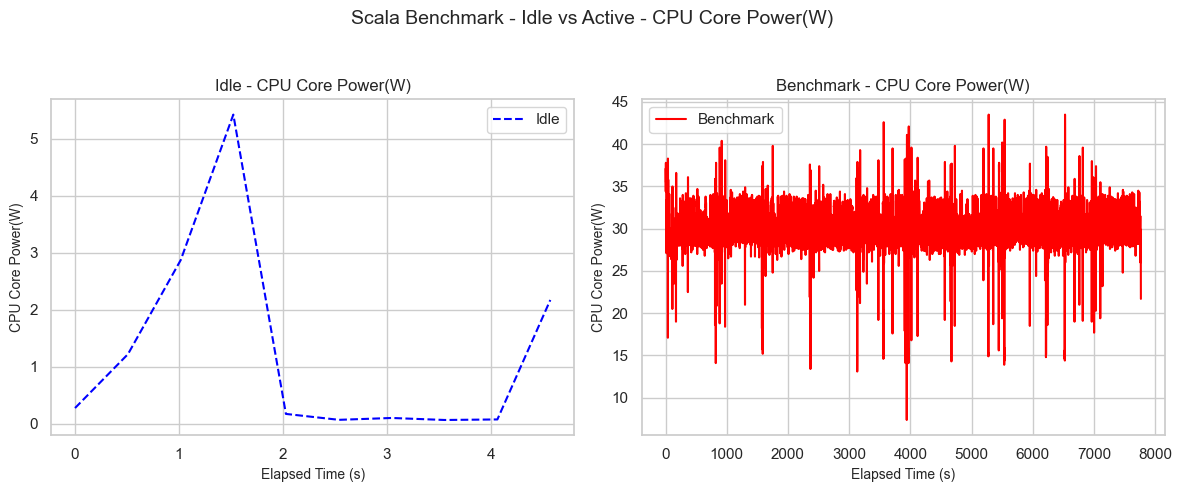

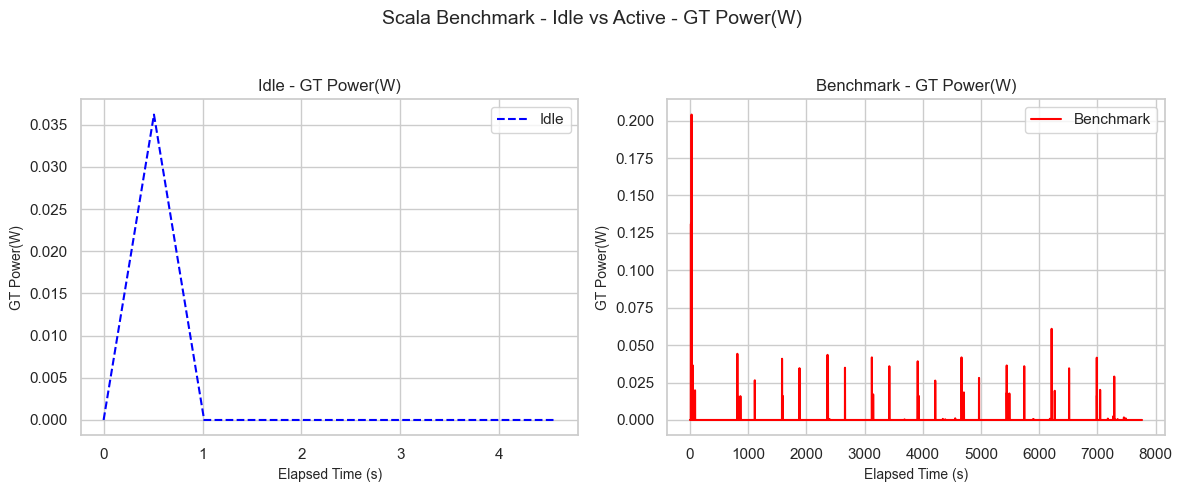

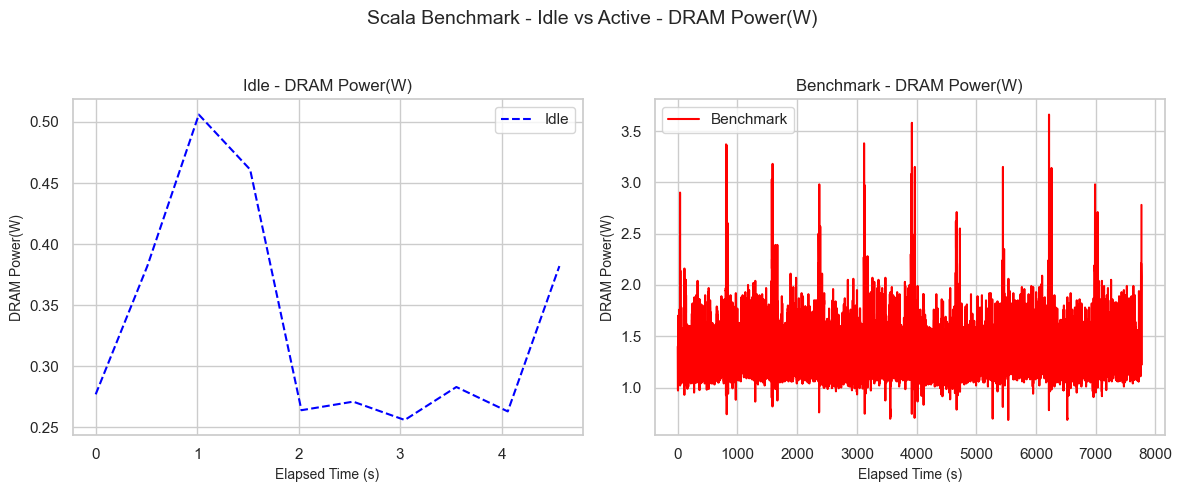

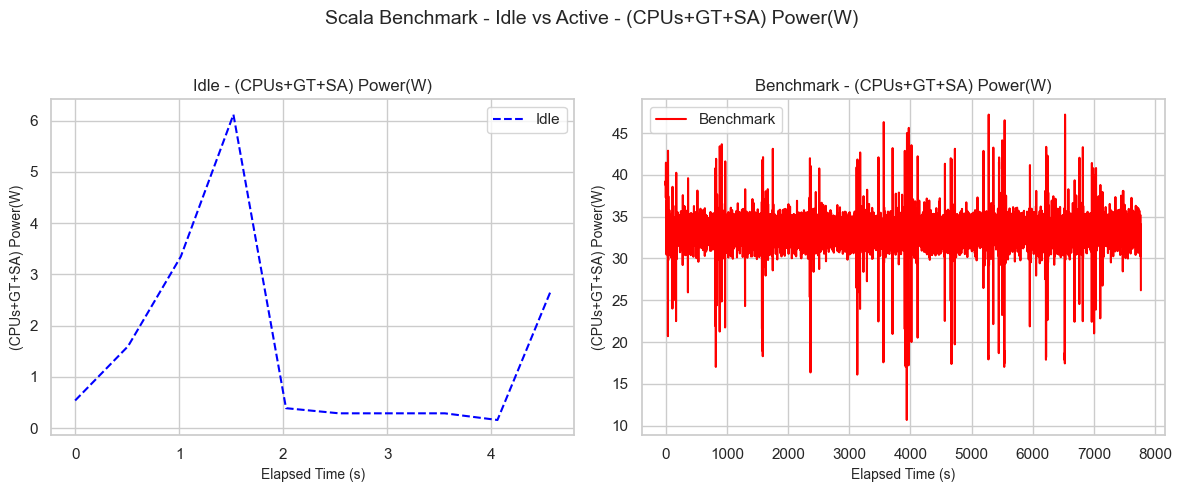

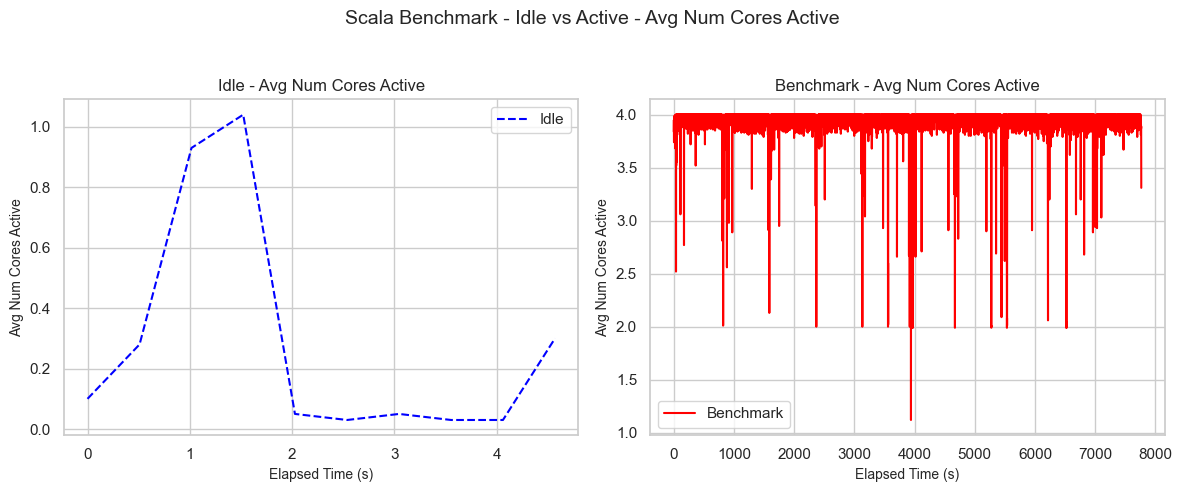

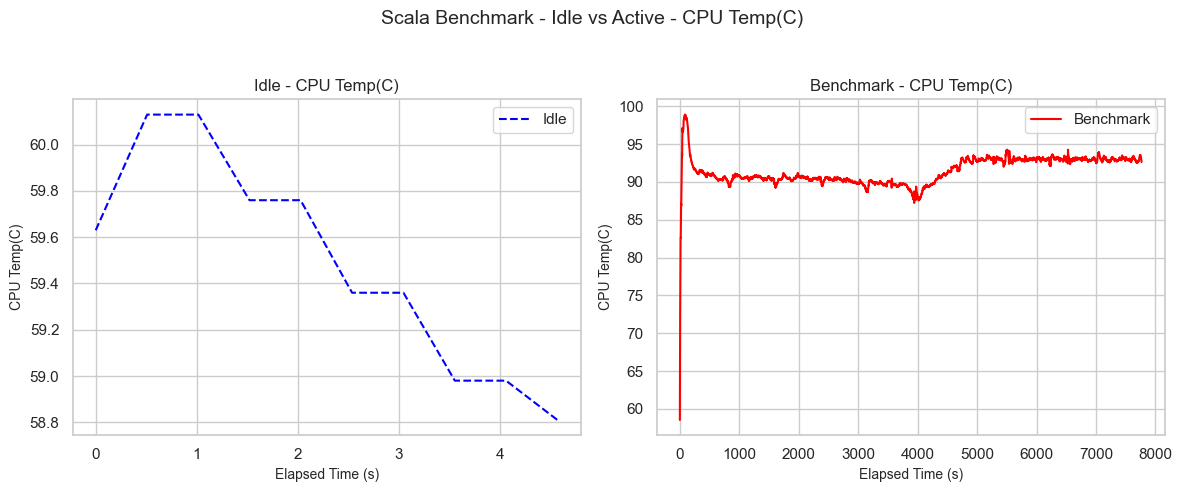

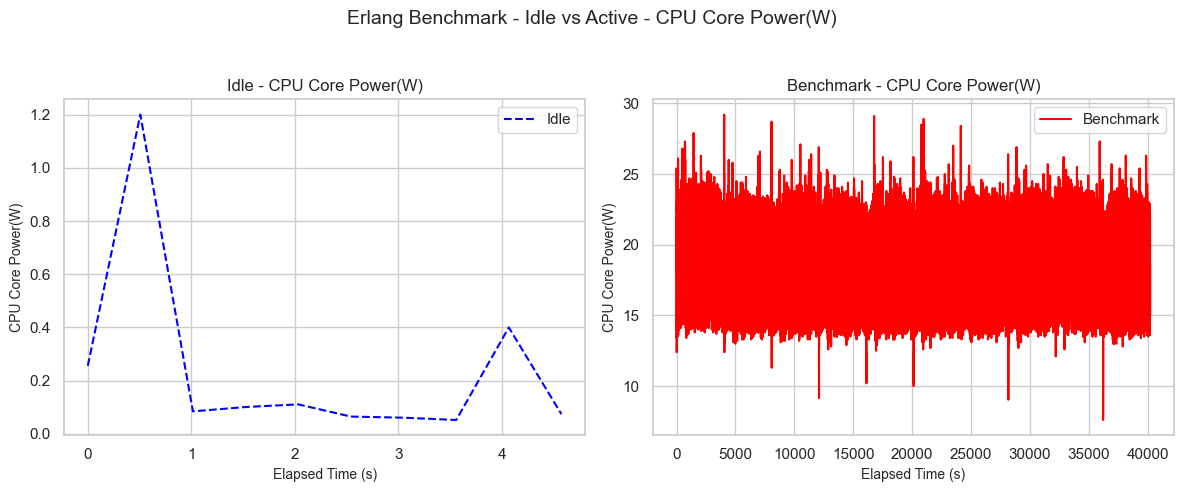

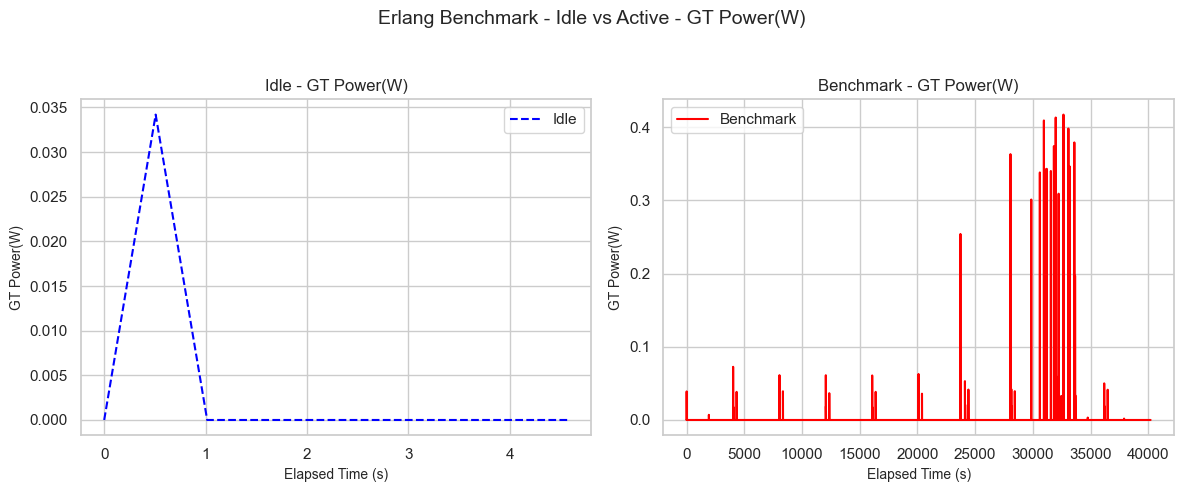

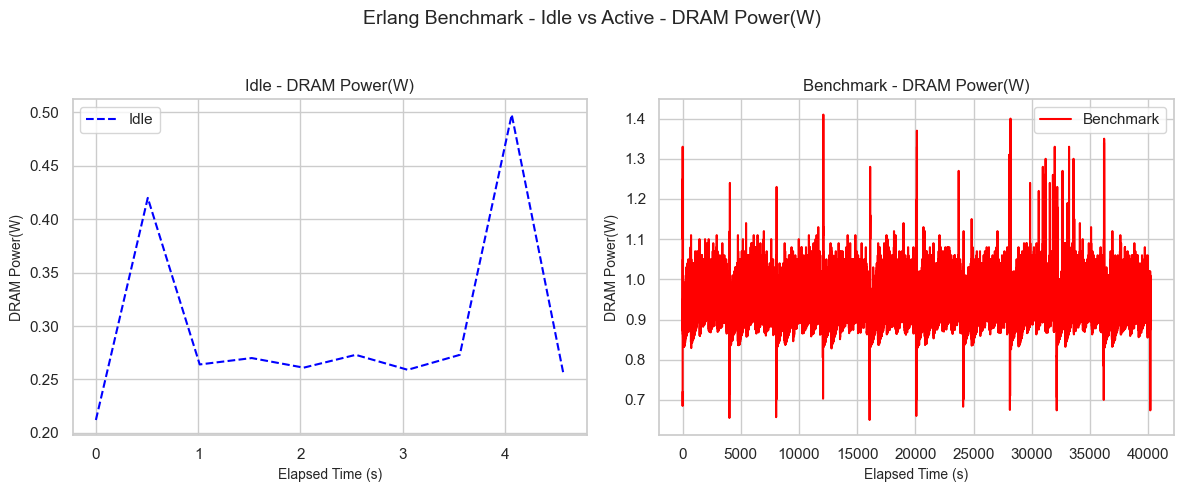

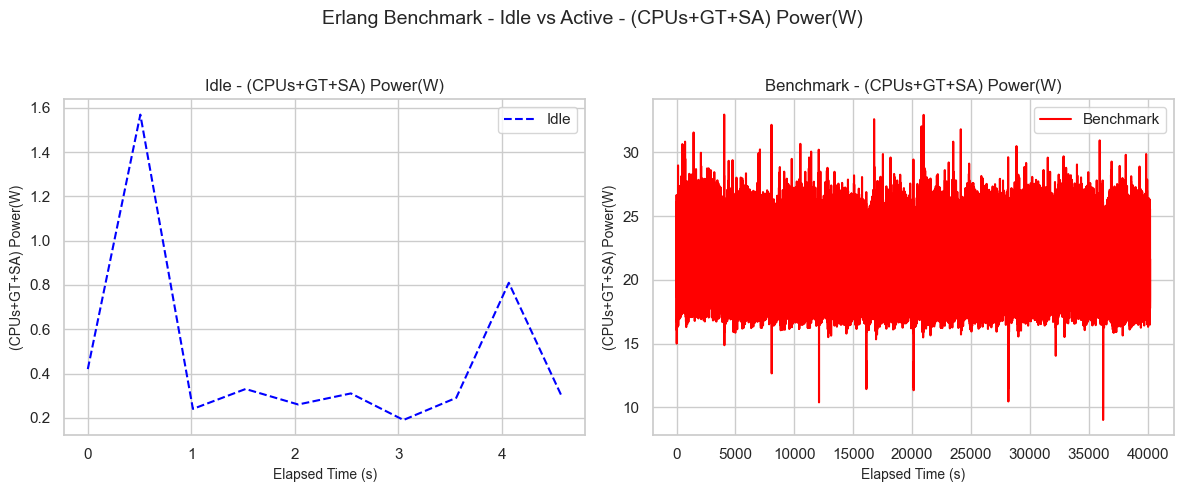

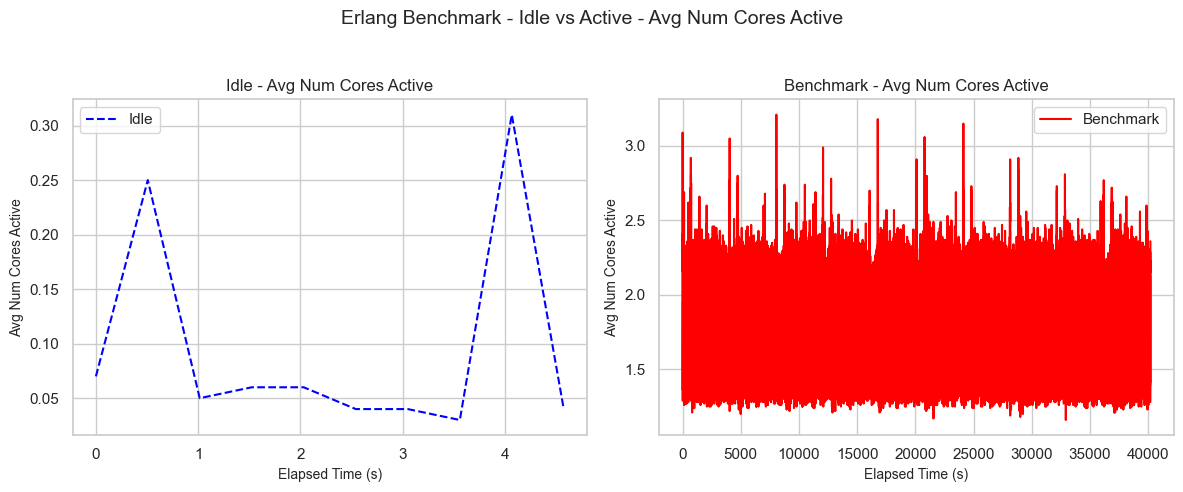

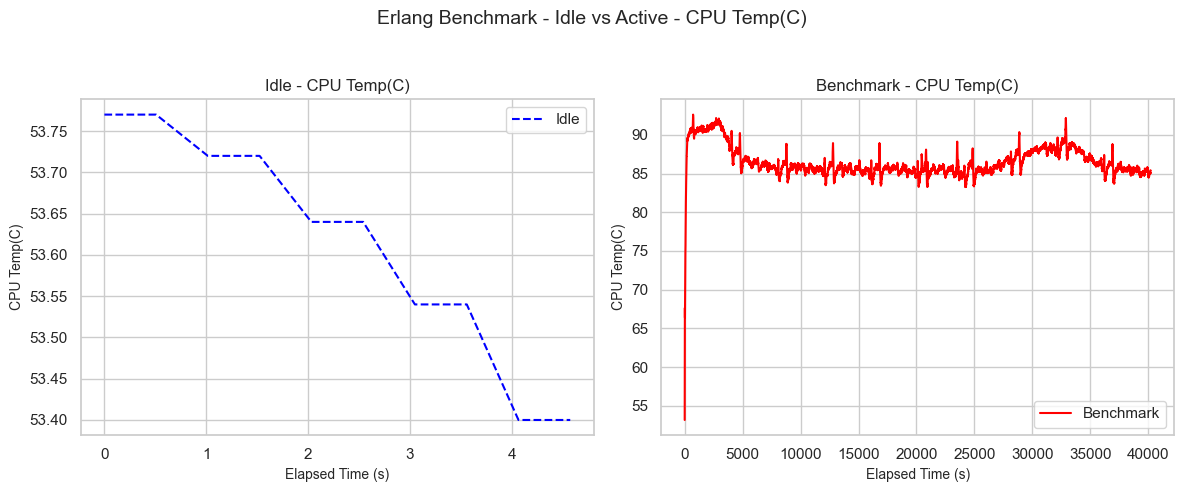

In [34]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [35]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        # ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [36]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

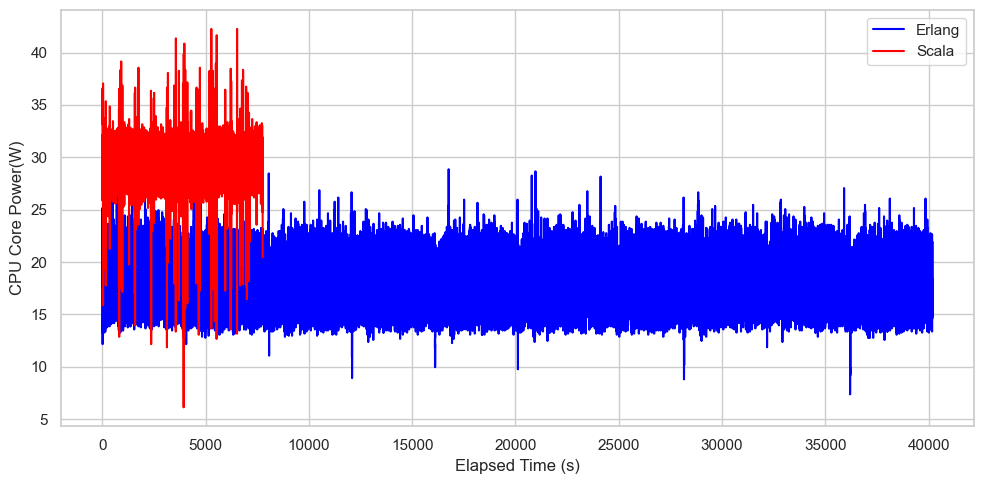

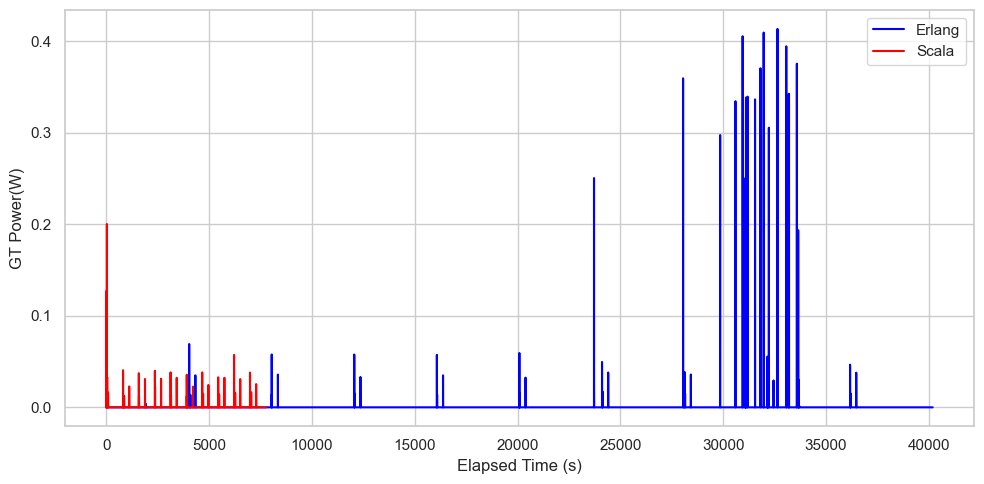

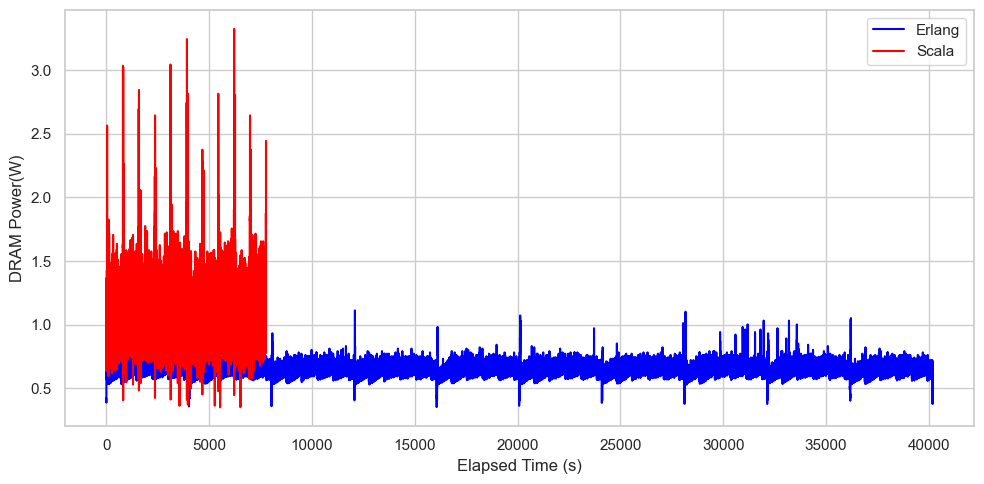

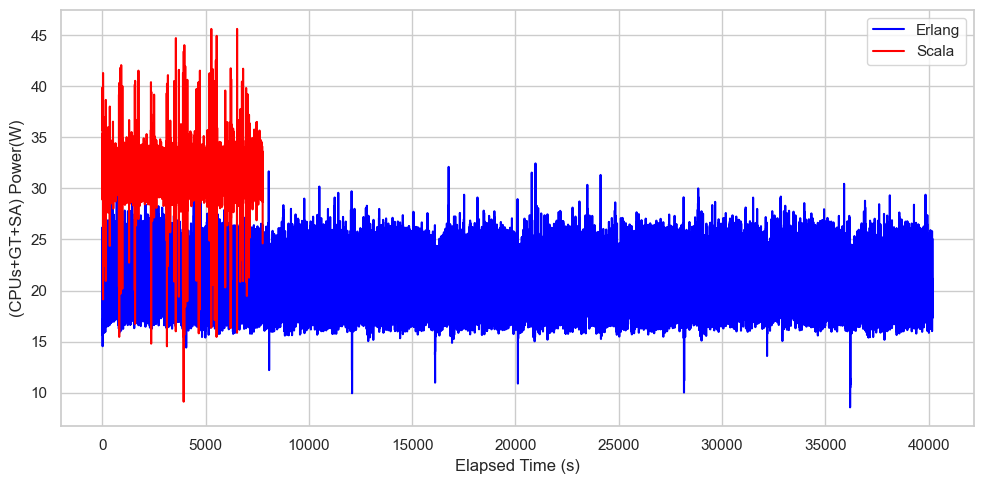

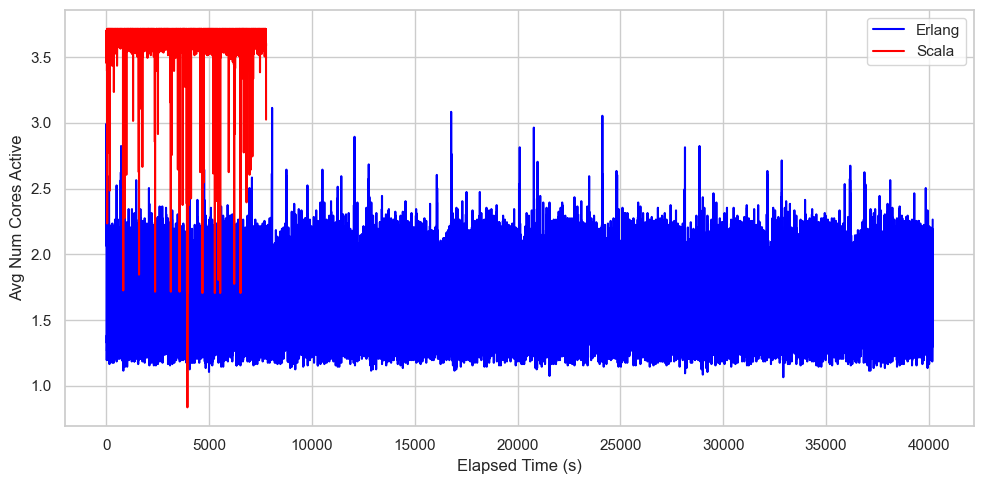

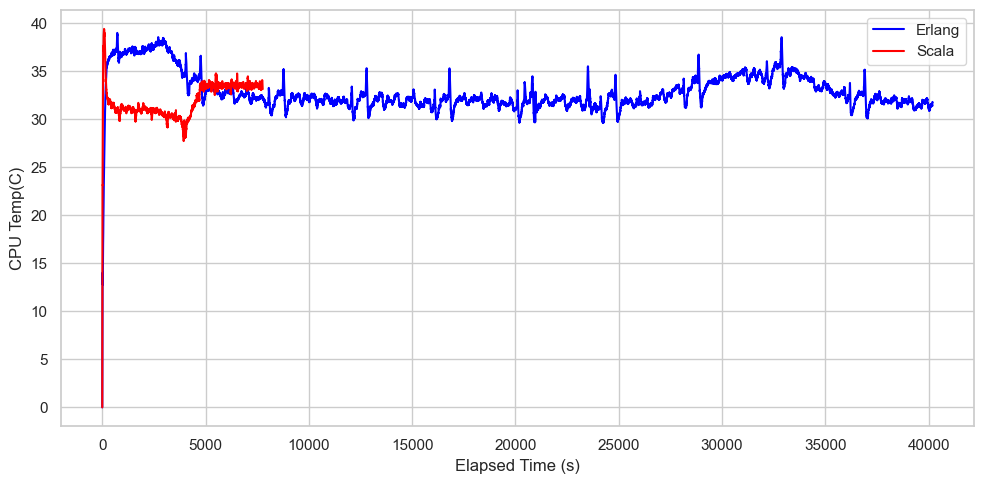

In [37]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [38]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [39]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Scala Idle Metrics:")
print(scala_idle_means, "\n")
print("Erlang Idle Metrics:")
print(erlang_idle_means, "\n")
print("Scala Benchmark Metrics:")
print(scala_bench_data[metrics_columns].mean(), "\n")
print("Erlang Benchmark Metrics:")
print(erlang_bench_data[metrics_columns].mean(), "\n")

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Scala Idle Metrics:
CPU Core Power(W)         1.24376
GT Power(W)               0.00362
DRAM Power(W)             0.33450
(CPUs+GT+SA) Power(W)     1.56900
CPU Temp(C)              59.49000
Avg Num Cores Active      0.28400
dtype: float64 

Erlang Idle Metrics:
CPU Core Power(W)         0.24053
GT Power(W)               0.00342
DRAM Power(W)             0.29840
(CPUs+GT+SA) Power(W)     0.47200
CPU Temp(C)              53.61400
Avg Num Cores Active      0.09500
dtype: float64 

Scala Benchmark Metrics:
CPU Core Power(W)        30.170078
GT Power(W)               0.000207
DRAM Power(W)             1.400375
(CPUs+GT+SA) Power(W)    33.211504
CPU Temp(C)              91.435906
Avg Num Cores Active      3.952658
dtype: float64 

Erlang Benchmark Metrics:
CPU Core Power(W)        16.220915
GT Power(W)               0.000346
DRAM Power(W)             0.911961
(CPUs+GT+SA) Power(W)    19.236064
CPU Temp(C)              86.473836
Avg Num Cores Active      1.538672
dtype: float64 

Net Average 

Compute Total Energy Consumption

In [40]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy,
    "Erlang Total Time(s)": erlang_total_time,
    "Scala Total Time(s)": scala_total_time,
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/thread_ring/3/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 232961.0207670953 Joules
Erlang Benchmark: 666956.1556101317 Joules
